In [ ]:
# labels is DataFrame

labels.min()
labels.max()
labels.mean()
labels.median()

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
labels.plot.hist(bins=26)

In [29]:
## Histogram for image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

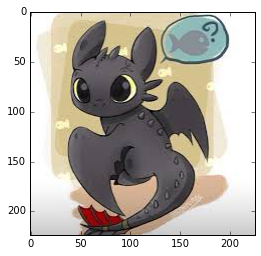

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

image = Image.open('./data/toothless.jpg')
plt.imshow(image)

(224, 225, 3)

(array([  656.,  1625.,  5359.,  8372.,  2116.,  1975.,   919.,  2083.,
        12307., 14988.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

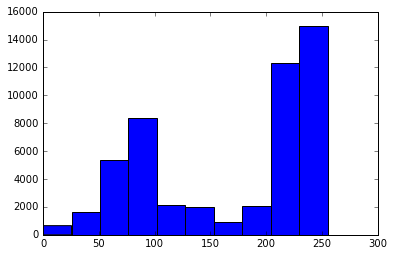

(array([ 1311.,  1815.,  6243.,  7871.,  1017.,  1210.,  2259.,  7600.,
         7628., 13446.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

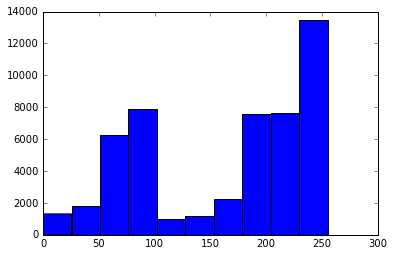

(array([ 1491.,  1773.,  5114.,  8141.,  2188.,  6796.,  4617.,  3939.,
         4749., 11592.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

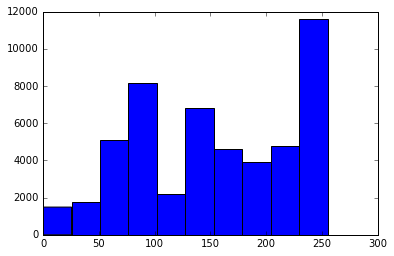

In [31]:
import numpy as np

image_array = np.asarray(image)
image_array.shape

for d in range(3):
    plt.hist(image_array[:,:,d].flatten())
    plt.show()

## Normalise pixel values